# Data parsing

In [1]:
using PyPlot: pygui
pygui(true)
using Plots
pyplot()

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Plots.PyPlotBackend()

LoadError: UndefVarError: py_import not defined

In [27]:
include("import_all.jl")

write_solution_to_file (generic function with 1 method)

## Small instance

### Reading the instance

In [34]:
data_petite = open("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite.csv") do file
    readlines(file)
end

33-element Array{String,1}:
 "J 3 U 2 F 3 E 2 L 13000 Gamma 1 CCam 100 CStop 10"
 "e 0 l 300"
 "e 1 l 200"
 "u 0 v 0 coor 48.8666672 2.3514623 ce e 0 cr 2 b 4 e 1 cr 4 b 5 lib j 0 e 0 b 5 r 5 e 1 b 0 r 5 j 1 e 0 b 10 r 5 e 1 b 5 r 5 j 2 e 0 b 0 r 5 e 1 b 5 r 5"
 "u 1 v 1 coor 43.6044622 1.4442469 ce e 0 cr 2 b 3 e 1 cr 4 b 6 lib j 0 e 0 b 2 r 5 e 1 b 3 r 5 j 1 e 0 b 2 r 5 e 1 b 3 r 5 j 2 e 0 b 2 r 5 e 1 b 3 r 5"
 "f 0 v 2 coor 48.8666672 2.3514623 ce e 0 cr 2 cexc 55 b 2 e 1 cr 4 cexc 30 b 6 dem j 0 e 0 b 2 r 5 e 1 b 1 r 5 j 1 e 0 b 2 r 5 e 1 b 1 r 5 j 2 e 0 b 2 r 5 e 1 b 1 r 5"
 "f 1 v 3 coor 45.7578137 4.8320114 ce e 0 cr 2 cexc 45 b 4 e 1 cr 4 cexc 40 b 5 dem j 0 e 0 b 0 r 5 e 1 b 2 r 4 j 1 e 0 b 0 r 6 e 1 b 2 r 4 j 2 e 0 b 0 r 3 e 1 b 2 r 4"
 "f 2 v 4 coor 45.7578137 4.8320114 ce e 0 cr 2 cexc 35 b 7 e 1 cr 4 cexc 50 b 4 dem j 0 e 0 b 3 r 5 e 1 b 0 r 5 j 1 e 0 b 3 r 5 e 1 b 0 r 5 j 2 e 0 b 3 r 5 e 1 b 0 r 5"
 "a 0 0 d 0"
 "a 0 1 d 10"
 "a 0 2 d 0"
 "a 0 3 d 8"
 "a 0 4 d 8"
 ⋮
 "a 2

In [35]:
dims_petite = lire_dimensions(data_petite[1])

(J = 3, U = 2, F = 3, E = 2, L = 13000, γ = 1, ccam = 100, cstop = 10)

In [36]:
emballages_petite = [lire_emballage(data_petite[1+e], dims_petite) for e = 1:dims_petite.E]

2-element Array{Emballage,1}:
 
Emballage 1
   Longueur 300
 
Emballage 2
   Longueur 200

In [37]:
usines_petite = [lire_usine(data_petite[1+dims_petite.E+u], dims_petite) for u = 1:dims_petite.U]

2-element Array{Usine,1}:
 
Usine 1
   Sommet 1
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Stock initial [4, 5]
   Libération journalière [5 10 0; 0 5 5]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [9 19 19; 5 10 15]
 
Usine 2
   Sommet 2
   Coordonnées (43.6044622, 1.4442469)
   Coûts stock [2, 4]
   Stock initial [3, 6]
   Libération journalière [2 2 2; 3 3 3]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [5 7 9; 9 12 15]

In [38]:
fournisseurs_petite = [
    lire_fournisseur(data_petite[1+dims_petite.E+dims_petite.U+f], dims_petite) for f = 1:dims_petite.F
]

3-element Array{Fournisseur,1}:
 
Fournisseur 1
   Sommet 3
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Coûts expédition carton [55, 30]
   Stock initial [2, 6]
   Consommation journalière [2 2 2; 1 1 1]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [0 0 0; 5 4 3]
 
Fournisseur 2
   Sommet 4
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [45, 40]
   Stock initial [4, 5]
   Consommation journalière [0 0 0; 2 2 2]
   Stock maximal journalier [5 6 3; 4 4 4]
   Stock journalier [4 4 4; 3 1 0]
 
Fournisseur 3
   Sommet 5
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [35, 50]
   Stock initial [7, 4]
   Consommation journalière [3 3 3; 0 0 0]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [4 1 0; 4 4 4]

In [39]:
graphe_petite = lire_graphe(data_petite[1+dims_petite.E+dims_petite.U+dims_petite.F+1:end], dims_petite)


Graphe pondéré avec 5 sommets et 25 arcs
   Distances (5 x 5): [0 10 0 8 8; 10 0 8 5 5; 0 8 0 8 8; 8 5 8 0 0; 8 5 8 0 0]

In [41]:
instance_petite = lire_instance("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite.csv")


Instance
   Nombre de jours: 3
   Nombre d'usines: 2
   Nombre de fournisseurs: 3
   Nombre de types d'emballages: 2
   Nombre de routes: 0

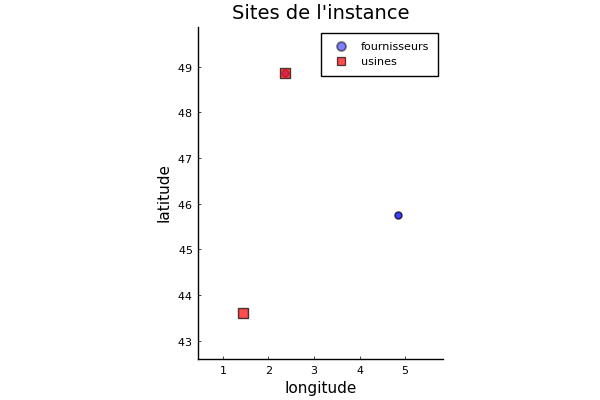

In [42]:
plot_sites(instance_petite)

In [43]:
plot_folium(instance_petite)

PyObject <folium.folium.Map object at 0x000000005B2B8190>

### Reading the solution

In [45]:
sol_petite = open("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite.txt") do file
    readlines(file)
end

4-element Array{String,1}:
 "R 3"
 "r 0 j 0 x 1 u 0 F 1 f 0 e 0 q 0 e 1 q 2"
 "r 1 j 1 x 1 u 0 F 3 f 0 e 0 q 1 e 1 q 1 f 1 e 0 q 1 e 1 q 1 f 2 e 0 q 1 e 1 q 1"
 "r 2 j 1 x 2 u 1 F 2 f 1 e 0 q 3 e 1 q 1 f 2 e 0 q 0 e 1 q 1"

In [46]:
routes_petite = [lire_route(sol_petite[1+r]) for r = 1:length(sol_petite)-1]

3-element Array{Route,1}:
 Route 1
   Jour 1
   Nb de camions 1
   Usine de départ 1
   Nb d'arrêts 1
   Stop 1
      Fournisseur 1
      Livraison [0, 2]
 Route 2
   Jour 2
   Nb de camions 1
   Usine de départ 1
   Nb d'arrêts 3
   Stop 1
      Fournisseur 1
      Livraison [1, 1]
   Stop 2
      Fournisseur 2
      Livraison [1, 1]
   Stop 3
      Fournisseur 3
      Livraison [1, 1]
 Route 3
   Jour 2
   Nb de camions 2
   Usine de départ 2
   Nb d'arrêts 2
   Stop 1
      Fournisseur 2
      Livraison [3, 1]
   Stop 2
      Fournisseur 3
      Livraison [0, 1]

In [48]:
instance_petite_solved = lire_solution(instance_petite, "C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite.txt")


Instance
   Nombre de jours: 3
   Nombre d'usines: 2
   Nombre de fournisseurs: 3
   Nombre de types d'emballages: 2
   Nombre de routes: 3

### Analyzing the solution

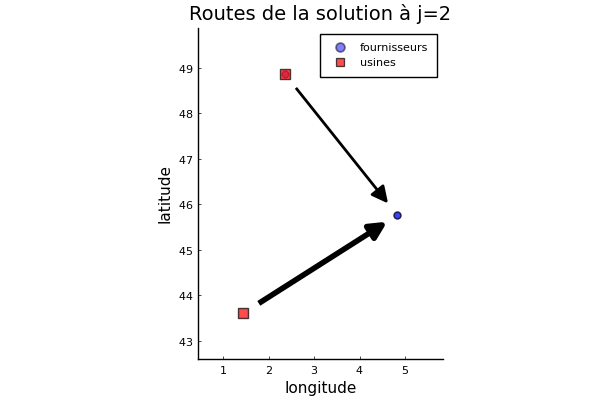

C:\Users\Wael\.julia\conda\3\lib\site-packages\matplotlib\patches.py:2806: RuntimeWarning: divide by zero encountered in double_scalars
  ff = d / (dx * dx + dy * dy) ** .5


In [49]:
plot_routes(instance_petite_solved, j=2)

In [50]:
plot_folium(instance_petite_solved)

PyObject <folium.folium.Map object at 0x000000005B3A6E50>

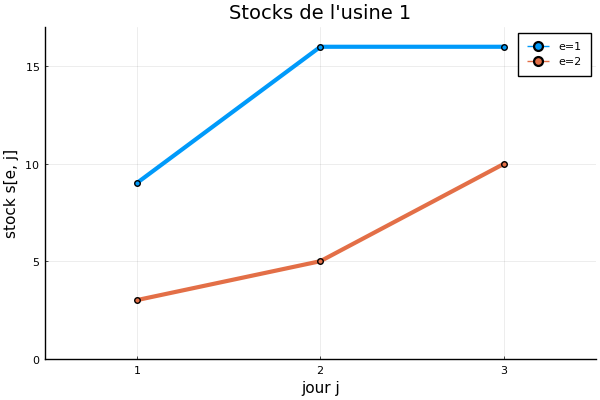

In [51]:
plot_stocks(instance_petite_solved.usines[1])

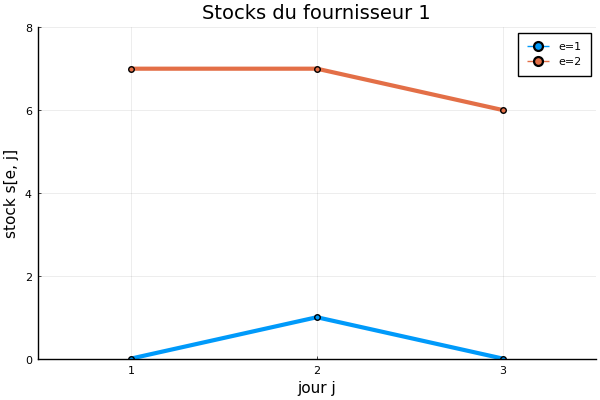

In [52]:
plot_stocks(instance_petite_solved.fournisseurs[1])

In [53]:
feasibility(instance_petite_solved)

true

In [54]:
cost(instance_petite)

552

In [55]:
cost(instance_petite_solved)

884

In [22]:
cost(instance_petite_solved, verbose=true)

Usine 1
   Jour 1
      Coût stock: 8
   Jour 2
      Coût stock: 22
   Jour 3
      Coût stock: 42
Usine 2
   Jour 1
      Coût stock: 16
   Jour 2
      Coût stock: 12
   Jour 3
      Coût stock: 24

Fournisseur 1
   Jour 1
      Coût stock: 8
      Coût expédition: 0
      Coût total: 8
   Jour 2
      Coût stock: 8
      Coût expédition: 110
      Coût total: 118
   Jour 3
      Coût stock: 4
      Coût expédition: 55
      Coût total: 59
Fournisseur 2
   Jour 1
      Coût stock: 0
      Coût expédition: 0
      Coût total: 0
   Jour 2
      Coût stock: 10
      Coût expédition: 0
      Coût total: 10
   Jour 3
      Coût stock: 16
      Coût expédition: 0
      Coût total: 16
Fournisseur 3
   Jour 1
      Coût stock: 0
      Coût expédition: 0
      Coût total: 0
   Jour 2
      Coût stock: 8
      Coût expédition: 0
      Coût total: 8
   Jour 3
      Coût stock: 8
      Coût expédition: 35
      Coût total: 43

Route 1, jour 1
   Coût camion: 100
   Coût arrêts: 10
   Coût kilom

884

### Text output

In [56]:
write_instance_to_file(instance_petite, "C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite_copy.csv")

true

In [57]:
s1 = open("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite.csv") do file1
    read(file1, String)
end

s2 = open("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite_copy.csv") do file2
    read(file2, String)
end

s1 == s2

true

In [58]:
write_solution_to_file(instance_petite_solved, "C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\sujet\\petite_copy.txt")

true

In [26]:
s1 = open(joinpath("..", "sujet", "petite.txt")) do file1
    read(file1, String)
end

s2 = open(joinpath("..", "sujet", "petite_copy.txt")) do file2
    read(file2, String)
end

s1 == s2

true

## Real instance

In [60]:
data_europe = open("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\instance\\europe.csv") do file
    readlines(file)
end

361830-element Array{String,1}:
 "J 21 U 25 F 576 E 27 L 13000 Gamma 1 CCam 150 CStop 40"
 "e 0 l 500"
 "e 1 l 500"
 "e 2 l 500"
 "e 3 l 500"
 "e 4 l 501"
 "e 5 l 500"
 "e 6 l 500"
 "e 7 l 510"
 "e 8 l 501"
 "e 9 l 200"
 "e 10 l 750"
 "e 11 l 950"
 ⋮
 "a 600 589 d 85"
 "a 600 590 d 12"
 "a 600 591 d 11"
 "a 600 592 d 47"
 "a 600 593 d 393"
 "a 600 594 d 369"
 "a 600 595 d 5"
 "a 600 596 d 5"
 "a 600 597 d 110"
 "a 600 598 d 168"
 "a 600 599 d 935"
 "a 600 600 d 0"

In [61]:
dims_europe = lire_dimensions(data_europe[1])

(J = 21, U = 25, F = 576, E = 27, L = 13000, γ = 1, ccam = 150, cstop = 40)

In [62]:
emballages_europe = [lire_emballage(data_europe[1+e], dims_europe) for e = 1:dims_europe.E]

27-element Array{Emballage,1}:
 
Emballage 1
   Longueur 500
 
Emballage 2
   Longueur 500
 
Emballage 3
   Longueur 500
 
Emballage 4
   Longueur 500
 
Emballage 5
   Longueur 501
 
Emballage 6
   Longueur 500
 
Emballage 7
   Longueur 500
 
Emballage 8
   Longueur 510
 
Emballage 9
   Longueur 501
 
Emballage 10
   Longueur 200
 
Emballage 11
   Longueur 750
 
Emballage 12
   Longueur 950
 
Emballage 13
   Longueur 500
 ⋮
 
Emballage 16
   Longueur 900
 
Emballage 17
   Longueur 583
 
Emballage 18
   Longueur 200
 
Emballage 19
   Longueur 200
 
Emballage 20
   Longueur 556
 
Emballage 21
   Longueur 500
 
Emballage 22
   Longueur 625
 
Emballage 23
   Longueur 625
 
Emballage 24
   Longueur 800
 
Emballage 25
   Longueur 1056
 
Emballage 26
   Longueur 801
 
Emballage 27
   Longueur 1200

In [63]:
usines_europe = [lire_usine(data_europe[1+dims_europe.E+u], dims_europe) for u = 1:dims_europe.U]

25-element Array{Usine,1}:
 
Usine 1
   Sommet 1
   Coordonnées (48.885429, 1.254996)
   Coûts stock [19, 3, 2, 2, 3, 3, 4, 4, 4, 33, 88, 88, 88, 88, 88, 88, 88, 42, 42, 85, 95, 109, 96, 104, 141, 103, 225]
   Stock initial [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 55, 0, 1, 13, 1, 32, 0, 2, 48, 3, 1, 3, 0, 5, 1]
   Libération journalière [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0

In [64]:
fournisseurs_europe = [
    lire_fournisseur(data_europe[1+dims_europe.E+dims_europe.U+f], dims_europe) for f = 1:dims_europe.F
]

576-element Array{Fournisseur,1}:
 
Fournisseur 1
   Sommet 26
   Coordonnées (49.370913, 6.222905)
   Coûts stock [38, 5, 3, 4, 5, 6, 7, 7, 8, 65, 176, 176, 176, 176, 176, 176, 176, 83, 83, 170, 190, 217, 191, 207, 281, 206, 450]
   Coûts expédition carton [120, 80, 200, 100, 300, 50, 150, 30, 120, 100, 270, 216, 270, 54, 270, 54, 108, 70, 140, 210, 168, 210, 210, 310, 310, 279, 248]
   Stock initial [0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
   Consommation journalière [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 3 3 3 3 3 0 0 3 3 3 3 3 0 0 2 2 2 2 2 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 0 0 0 0

In [65]:
graphe_europe = lire_graphe(data_europe[1+dims_europe.E+dims_europe.U+dims_europe.F+1:end], dims_europe)

Reading graph 100%|█████████████████████████████████████| Time: 0:00:00



Graphe pondéré avec 601 sommets et 361201 arcs
   Distances (10 x 10): [0 104 53 77 53 195 60 296 1439 60; 104 0 58 45 58 103 142 241 1502 141; 53 58 0 23 1 159 83 249 1485 83; 77 45 23 0 24 149 100 228 1506 99; 53 58 1 24 0 159 83 250 1484 83; 195 103 159 149 159 0 242 290 1502 242; 60 142 83 100 83 242 0 278 1469 0; 296 241 249 228 250 290 278 0 1734 278; 1439 1502 1485 1506 1484 1502 1469 1734 0 1469; 60 141 83 99 83 242 0 278 1469 0]

In [67]:
instance_europe = lire_instance("C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\instance\\europe.csv")

Reading graph 100%|█████████████████████████████████████| Time: 0:00:00



Instance
   Nombre de jours: 21
   Nombre d'usines: 25
   Nombre de fournisseurs: 576
   Nombre de types d'emballages: 27
   Nombre de routes: 0

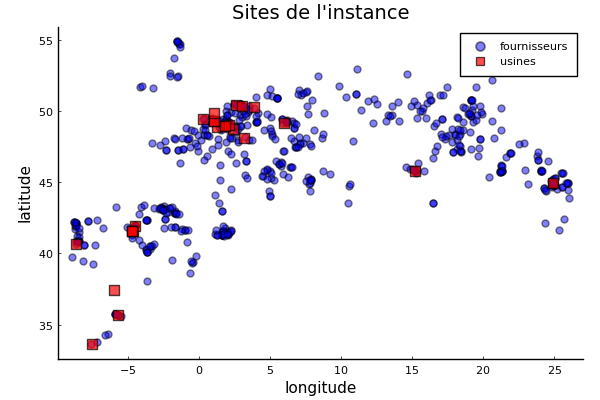

In [68]:
plot_sites(instance_europe)

In [83]:
plot_folium(instance_europe, include_fournisseurs = true)

PyObject <folium.folium.Map object at 0x00000000A41CB7C0>

In [71]:
cost(instance_europe)

41777761

### Smaller instances

In [72]:
instance_france = restrict(instance_europe, "FRA")

This program has requested access to the data dependency GADM_FRA.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Geographic data for country FRA provided by the https://gadm.org project.


Do you want to download the dataset from https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_FRA_gpkg.zip to "C:\Users\Wael\.julia\datadeps\GADM_FRA"?
[y/n]
stdin> y


┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_FRA_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_FRA\gadm36_FRA_gpkg.zip
│   progress = 1.0
│   time_taken = 0.03 s
│   time_remaining = 0.0 s
│   average_speed = 12.225 KiB/s
│   downloaded = 338 bytes
│   remaining = 0 bytes
│   total = 338 bytes
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119
┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_FRA_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_FRA\gadm36_FRA_gpkg.zip
│   progress = 0.1623
│   time_taken = 5.16 s
│   time_remaining = 26.61 s
│   average_speed = 415.907 KiB/s
│   downloaded = 2.094 MiB
│   remaining = 10.809 MiB
│   total = 12.903 MiB
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119
┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_FRA_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_FRA\gadm36_FRA_gpk


7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive for archives:
1 file, 13529738 bytes (13 MiB)

Extracting archive: C:\Users\Wael\.julia\datadeps\GADM_FRA\gadm36_FRA_gpkg.zip
--
Path = C:\Users\Wael\.julia\datadeps\GADM_FRA\gadm36_FRA_gpkg.zip
Type = zip
Physical Size = 13529738

Everything is Ok

Files: 2
Size:       48312620
Compressed: 13529738



Instance
   Nombre de jours: 21
   Nombre d'usines: 14
   Nombre de fournisseurs: 184
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [73]:
plot_folium(instance_france, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x000000005F823310>

In [74]:
instance_espagne = restrict(instance_europe, "ESP")

This program has requested access to the data dependency GADM_ESP.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Geographic data for country ESP provided by the https://gadm.org project.


Do you want to download the dataset from https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_ESP_gpkg.zip to "C:\Users\Wael\.julia\datadeps\GADM_ESP"?
[y/n]
stdin> y


┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_ESP_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_ESP\gadm36_ESP_gpkg.zip
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = ∞ B/s
│   downloaded = 338 bytes
│   remaining = 0 bytes
│   total = 338 bytes
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119
┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_ESP_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_ESP\gadm36_ESP_gpkg.zip
│   progress = 1.0
│   time_taken = 4.85 s
│   time_remaining = 0.0 s
│   average_speed = 1.921 MiB/s
│   downloaded = 9.315 MiB
│   remaining = 0 bytes
│   total = 9.315 MiB
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119
┌ Warning: Checksum not provided, add to the Datadep Registration the following hash line
│   hash = b4c7059aa609464e3ba4a134c846ef7494964d8a84ce402cb02ea0e99ab88cb4
└ @ DataDeps C:


7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive for archives:
1 file, 9767512 bytes (9539 KiB)

Extracting archive: C:\Users\Wael\.julia\datadeps\GADM_ESP\gadm36_ESP_gpkg.zip
--
Path = C:\Users\Wael\.julia\datadeps\GADM_ESP\gadm36_ESP_gpkg.zip
Type = zip
Physical Size = 9767512

Everything is Ok

Files: 2
Size:       32026924
Compressed: 9767512



Instance
   Nombre de jours: 21
   Nombre d'usines: 6
   Nombre de fournisseurs: 113
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [75]:
plot_folium(instance_espagne, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x0000000062EF2D90>

In [84]:
instance_maroc = restrict(instance_europe, "MAR")

This program has requested access to the data dependency GADM_MAR.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Geographic data for country MAR provided by the https://gadm.org project.


Do you want to download the dataset from https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_MAR_gpkg.zip to "C:\Users\Wael\.julia\datadeps\GADM_MAR"?
[y/n]
stdin> y


┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_MAR_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_MAR\gadm36_MAR_gpkg.zip
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 330.078 KiB/s
│   downloaded = 338 bytes
│   remaining = 0 bytes
│   total = 338 bytes
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119



7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive for archives:
1 file, 2603209 bytes (2543 KiB)

Extracting archive: C:\Users\Wael\.julia\datadeps\GADM_MAR\gadm36_MAR_gpkg.zip
--
Path = C:\Users\Wael\.julia\datadeps\GADM_MAR\gadm36_MAR_gpkg.zip
Type = zip
Physical Size = 2603209

Everything is Ok

Files: 2
Size:       8671532
Compressed: 2603209


┌ Info: Downloading
│   source = https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_MAR_gpkg.zip
│   dest = C:\Users\Wael\.julia\datadeps\GADM_MAR\gadm36_MAR_gpkg.zip
│   progress = 1.0
│   time_taken = 4.56 s
│   time_remaining = 0.0 s
│   average_speed = 557.744 KiB/s
│   downloaded = 2.483 MiB
│   remaining = 0 bytes
│   total = 2.483 MiB
└ @ HTTP C:\Users\Wael\.julia\packages\HTTP\IAI92\src\download.jl:119
┌ Warning: Checksum not provided, add to the Datadep Registration the following hash line
│   hash = 07c194cfaf53f6bae87fe97da06bd7cf804eb9f0359c3f2df1f1bec111609033
└ @ DataDeps C:\Users\Wael\.julia\packages\DataDeps\jrlAW\src\verification.jl:44



Instance
   Nombre de jours: 21
   Nombre d'usines: 2
   Nombre de fournisseurs: 12
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [85]:
plot_folium(instance_maroc, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x00000000A6C39A00>

In [87]:
write_instance_to_file(instance_france, "C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\instance\\france.csv")
write_instance_to_file(instance_espagne,"C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\instance\\espagne.csv")
write_instance_to_file(instance_maroc, "C:\\Users\\Wael\\Desktop\\SujetProjet20202021\\instance\\maroc.csv")

true

### Costs with no routes

In [88]:
cost(instance_europe)

41777761

In [89]:
cost(instance_france)

18101735

In [90]:
cost(instance_espagne)

12662240

In [91]:
cost(instance_maroc)

774692

In [92]:
cost(instance_petite)

552